# 5. Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neural_network as nn

In [2]:
def create_toy_dataset(func, n=300):
    x = np.random.uniform(size=(n, 1))
    t = func(x) + np.random.uniform(-0.1, 0.1, size=(n, 1))
    return x, t

def func(x):
        return x + 0.3 * np.sin(2 * np.pi * x)

x, t = create_toy_dataset(func)

In [3]:
layers = [nn.Layer(1, 6, std=1., bias=-0.5), nn.Tanh(), nn.Layer(6, 1, std=1., bias=0.5)]
cost_function = nn.SumSquaresError()
model = nn.NeuralNetwork(layers, cost_function)
# nn._gradient_check()
for i in range(100000):
    if i % 10000 == 0:
        print("step %6d, cost %f" % (i, model.cost(x, t)))
    model.fit(x, t, learning_rate=0.001)

step      0, cost 302.416038
step  10000, cost 0.473735
step  20000, cost 0.486447
step  30000, cost 0.473035
step  40000, cost 0.472922
step  50000, cost 0.472838
step  60000, cost 0.472773
step  70000, cost 0.472723
step  80000, cost 0.472677
step  90000, cost 0.472640


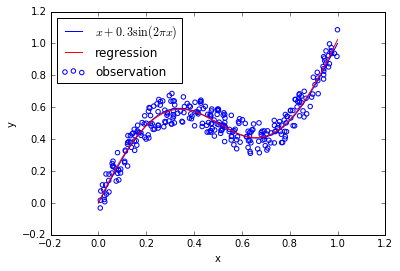

In [6]:
plt.scatter(x, t, facecolor="none", edgecolor="b", label="observation")
x_test = np.linspace(0, 1, 1000)[:, np.newaxis]
y = model.predict(x_test)
plt.plot(x_test, func(x_test), color="blue", label="$x+0.3\sin(2\pi x)$")
plt.plot(x_test, y, color="red", label="regression")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.show()